# This notebook will merge the IMDB data with the BOM gross movie data, then clean and analyze it

Additionally- merged the writer/director data to the basic information in imdb

In [153]:
import pandas as pd
import numpy as np

In [154]:
#import the two data sets
movie_gross_df = pd.read_csv('../data/zippedData/bom.movie_gross.csv.gz', compression = 'gzip')
title_basics_df = pd.read_csv('../data/zippedData/imdb.title.basics.csv.gz', compression = 'gzip')
# check the titles data set was read properly
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [155]:
# check the movie gross data set was read properly
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [156]:
#checking for columns with nulls
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [157]:
#fill any NaN genres with 'unknown', so that I can split the string of genres into a list
title_basics_df['genres'] = title_basics_df['genres'].fillna('unknown')

In [158]:
#checking that all NaNs are gone
title_basics_df['genres'].isna().sum()

0

In [159]:
#split genre strings into a list of genres
title_basics_df['genres'] = [x.split(',') for x in title_basics_df['genres']]

In [160]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]"


In [161]:
movie_gross_df.loc[movie_gross_df['title'].str.contains('\(')].head(150)

,title,studio,domestic_gross,foreign_gross,year
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
10,Clash of the Titans (2010),WB,163200000.0,330000000,2010
55,A Nightmare on Elm Street (2010),WB (NL),63100000.0,52600000,2010
63,Aftershock (Tangshan Dadizhen),CL,63000.0,100200000,2010
79,If You Are the One 2 (Fei Cheng Wu Rao II),CL,427000.0,75600000,2010
...,...,...,...,...,...
1622,Left Behind (2014),Free,14000000.0,5700000,2014
1626,Sabotage (2014),ORF,10500000.0,7000000,2014
1636,Island of Lemurs: Madagascar (IMAX),WB,11300000.0,2800000,2014
1641,The Interview (2014),Sony,6100000.0,5200000,2014


In [162]:
title_basics_df.loc[title_basics_df['primary_title'].str.contains('Aftershock')]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
7221,tt1393746,Aftershock,Tang shan da di zhen,2010,135.0,[Drama]
17221,tt1780762,Aftershock,Aftershock,2012,89.0,"[Action, Adventure, Horror]"
80948,tt4653172,Aftershocks: Earthquake in Haiti,Aftershocks: Earthquake in Haiti,2011,60.0,"[Documentary, News]"
112751,tt6615220,Cellular Aftershocks,Cellular Aftershocks,2017,90.0,[Documentary]
118719,tt7116248,Afterburn/Aftershock,Afterburn/Aftershock,2017,99.0,[Romance]


In [163]:
#remove all parentheticals from the movie_gross_df to allow more titles to match IMDB, which does not have years or original titles in parentheses

for row in movie_gross_df.index:
        if '('  in movie_gross_df['title'][row]:
            split = movie_gross_df['title'][row].split('(') 
            movie_gross_df['title'][row] = split[0]


/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [164]:
movie_gross_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland,BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [165]:
print(movie_gross_df.info())
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             146144 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [166]:
combined_df = movie_gross_df.merge(title_basics_df, left_on = ['title', 'year'], right_on = ['primary_title', 'start_year'])

In [167]:
combined_df.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"[Adventure, Animation, Comedy]"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"[Action, Adventure, Sci-Fi]"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"[Adventure, Animation, Comedy]"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"[Adventure, Drama, Fantasy]"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"[Action, Adventure, Sci-Fi]"


In [168]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 0 to 1869
Data columns (total 11 columns):
title              1870 non-null object
studio             1868 non-null object
domestic_gross     1860 non-null float64
foreign_gross      1278 non-null object
year               1870 non-null int64
tconst             1870 non-null object
primary_title      1870 non-null object
original_title     1870 non-null object
start_year         1870 non-null int64
runtime_minutes    1860 non-null float64
genres             1870 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 175.3+ KB


In [169]:
#checking for duplicates in new dataframe
combined_df[combined_df.duplicated(subset= ['title', 'year'], keep = False)]

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
41,The Bounty Hunter,Sony,67099999.0,69300000,2010,tt1038919,The Bounty Hunter,The Bounty Hunter,2010,110.0,"[Action, Comedy, Romance]"
42,The Bounty Hunter,Sony,67099999.0,69300000,2010,tt1472211,The Bounty Hunter,The Bounty Hunter,2010,NaN,[unknown]
56,Burlesque,SGem,39400000.0,50100000,2010,tt1126591,Burlesque,Burlesque,2010,119.0,"[Drama, Music, Musical]"
57,Burlesque,SGem,39400000.0,50100000,2010,tt1586713,Burlesque,Burlesque,2010,NaN,[Drama]
98,Leap Year,Uni.,25900000.0,6700000,2010,tt1216492,Leap Year,Leap Year,2010,100.0,"[Comedy, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...
1817,Colette,BST,5100000.0,NaN,2018,tt9461382,Colette,Colette,2018,29.0,"[Documentary, Mystery]"
1851,The Guardians,MBox,177000.0,NaN,2018,tt7348082,The Guardians,The Guardians,2018,104.0,[Documentary]
1852,The Guardians,MBox,177000.0,NaN,2018,tt8150132,The Guardians,The Guardians,2018,70.0,[Documentary]
1857,The Negotiation,CJ,111000.0,NaN,2018,tt6904272,The Negotiation,The Negotiation,2018,114.0,"[Action, Crime, Thriller]"


The movies aren't always duplicates in the imdb data, but they seem to be matched up to the same bom movie gross information. If this were actually being used to make decisions, I would try to use the movie studio information in the bom movie gross to figure out which movie these should actually be used for. For this project, I don't have time to investigate further and am going to drop the 2nd instance of these duplicates based on the null values in the second instances of the first two movies.

In [170]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 0 to 1869
Data columns (total 11 columns):
title              1870 non-null object
studio             1868 non-null object
domestic_gross     1860 non-null float64
foreign_gross      1278 non-null object
year               1870 non-null int64
tconst             1870 non-null object
primary_title      1870 non-null object
original_title     1870 non-null object
start_year         1870 non-null int64
runtime_minutes    1860 non-null float64
genres             1870 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 175.3+ KB


In [171]:
#drop duplicates
combined_df.drop_duplicates(subset= ['title', 'year'], inplace = True)

In [172]:
combined_df

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"[Adventure, Animation, Comedy]"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"[Action, Adventure, Sci-Fi]"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"[Adventure, Animation, Comedy]"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"[Adventure, Drama, Fantasy]"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...
1865,Girls vs Gangsters,WGUSA,37100.0,NaN,2018,tt7870578,Girls vs Gangsters,Gui mi 2,2018,120.0,"[Comedy, Drama]"
1866,The Workshop,Strand,22100.0,NaN,2018,tt7405478,The Workshop,The Workshop,2018,80.0,[Thriller]
1867,A Paris Education,KL,21600.0,NaN,2018,tt6593240,A Paris Education,Mes provinciales,2018,137.0,[Drama]
1868,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"[Action, Drama, Thriller]"


In [173]:
#import imdb ratings dataset
title_rating_df = pd.read_csv('../data/zippedData/imdb.title.ratings.csv.gz', compression = 'gzip')

In [174]:
#merge ratings with the combined bom imdb title basics
combined_df = combined_df.merge(title_rating_df, on = ['tconst'])

In [175]:
combined_df.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"[Adventure, Animation, Comedy]",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"[Adventure, Animation, Comedy]",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"[Adventure, Drama, Fantasy]",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"[Action, Adventure, Sci-Fi]",7.0,657690


In [176]:
#drop columns I don't need
combined_df.drop(columns=['original_title', 'primary_title', 'start_year'], inplace = True)

In [177]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 1818
Data columns (total 10 columns):
title              1819 non-null object
studio             1817 non-null object
domestic_gross     1809 non-null float64
foreign_gross      1252 non-null object
year               1819 non-null int64
tconst             1819 non-null object
runtime_minutes    1818 non-null float64
genres             1819 non-null object
averagerating      1819 non-null float64
numvotes           1819 non-null int64
dtypes: float64(3), int64(2), object(5)
memory usage: 156.3+ KB


In [178]:
#checking type of genres column to make sure it's a list as it looks
type(combined_df['genres'][0])

list

In [179]:
import seaborn as sns

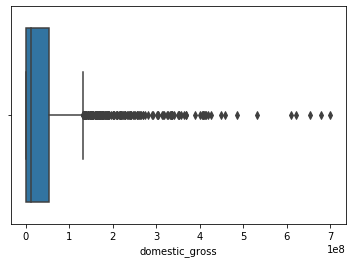

In [180]:
#look at distribution of domestic gross of movies
sns.boxplot(combined_df['domestic_gross'])

In [181]:
combined_df['domestic_gross'].describe()

count    1.809000e+03
mean     4.310175e+07
std      7.763452e+07
min      3.000000e+02
25%      5.840000e+05
50%      1.080000e+07
75%      5.270000e+07
max      7.001000e+08
Name: domestic_gross, dtype: float64

In [182]:
combined_df['domestic_gross'].median()

10800000.0

In [183]:
#separate dataset into top and bottom half of domestic gross
top_half = combined_df[combined_df['domestic_gross'] > 10800000]
bottom_half = combined_df[combined_df['domestic_gross'] < 10800000]

In [184]:
#create top quintile dataset
top_quintile = combined_df[combined_df['domestic_gross'] >= 52700000]

In [185]:
top_quintile.describe()

,domestic_gross,year,runtime_minutes,averagerating,numvotes
count,4.530000e+02,453.000000,453.000000,453.000000,4.530000e+02
mean,1.397210e+08,2013.781457,114.203091,6.673068,2.463449e+05
std,1.048127e+08,2.539669,18.510181,0.924915,2.214873e+05
min,5.270000e+07,2010.000000,80.000000,1.600000,6.867000e+03
25%,6.920000e+07,2012.000000,100.000000,6.200000,9.290500e+04
50%,1.021000e+08,2014.000000,112.000000,6.700000,1.835490e+05
75%,1.691000e+08,2016.000000,126.000000,7.300000,3.440470e+05
max,7.001000e+08,2018.000000,180.000000,8.800000,1.841066e+06


In [186]:
top_half.describe()

,domestic_gross,year,runtime_minutes,averagerating,numvotes
count,9.030000e+02,903.000000,903.000000,903.000000,9.030000e+02
mean,8.455404e+07,2013.867110,110.772979,6.496788,1.666420e+05
std,9.295140e+07,2.572249,17.653365,0.951449,1.852633e+05
min,1.090000e+07,2010.000000,46.000000,1.600000,2.400000e+01
25%,2.825000e+07,2012.000000,98.000000,5.900000,4.900450e+04
50%,5.300000e+07,2014.000000,108.000000,6.500000,1.024590e+05
75%,1.022500e+08,2016.000000,121.000000,7.200000,2.136375e+05
max,7.001000e+08,2018.000000,180.000000,8.800000,1.841066e+06


In [187]:
bottom_half.describe()

,domestic_gross,year,runtime_minutes,averagerating,numvotes
count,9.040000e+02,904.000000,903.000000,904.000000,904.000000
mean,1.766782e+06,2014.103982,111.280177,6.343916,20508.941372
std,2.473242e+06,2.439120,21.356807,1.038509,28638.000006
min,3.000000e+02,2010.000000,40.000000,1.600000,12.000000
25%,1.047500e+05,2012.000000,96.000000,5.700000,2853.000000
50%,5.830000e+05,2014.000000,107.000000,6.400000,9312.500000
75%,2.500000e+06,2016.000000,124.000000,7.100000,27587.500000
max,1.070000e+07,2018.000000,189.000000,8.800000,205240.000000


In [188]:
# function that will take the genre column of a dataframe and turn it into a new dataframe with the genres as columns
# with ones in the columns that represent the movie genres

def createcolumninfoDF(dataframe):
    #putting all the below functions together
    return dropandsum(fillgenres(creategenrecols(genrelistfromDF(dataframe), genreDF(dataframe)), genrelistfromDF(dataframe)))

def dropandsum(dataframe):
    dataframe.drop(columns = ['genres'], inplace = True)
    return dataframe.sum()

def fillgenres(dataframe, _list):
    #fills in a dataframe (will use the one created in creategencols()) based on the list in it's ['genres'] column
    for row in dataframe.index:
        for genre in _list:
            if genre in dataframe['genres'][row]:
                dataframe[genre][row]  = 1
    return dataframe

def creategenrecols(_list, dataframe):
    #create columns from a list (will use the one created with genrelistfromDF()) 
    #in a dataframe (will use one created with genreDF())
    for col in _list:
        dataframe[col] = 0
    return dataframe
    
def genrelistfromDF(dataframe):
    #create and return a list of genres present in the argument
    genre_list = set(dataframe['genres'].sum())
    return genre_list

    
def genreDF(dataframe):
    #create and return a dataframe from the genres series of the argument
    genre_df = pd.DataFrame(dataframe['genres'])
    return genre_df

In [190]:
bottom = creategenreinfoDF(bottom_half, 'genres')
type(bottom)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


pandas.core.series.Series

In [192]:
#run the above function on each of my datasets and assign the new dataframe a name
bottom_half_genres = creategenreinfoDF(bottom_half, 'genres')
top_half_genres = creategenreinfoDF(top_half, 'genres')
top_quintile_genres = creategenreinfoDF(top_quintile, 'genres')

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [193]:
#df with sums for each genre as number of movies for each dataset
bottom_number = pd.DataFrame(bottom_half_genres, columns=['number_of_movies'])
top_number = pd.DataFrame(top_half_genres, columns=['number_of_movies'])
top_quint_number = pd.DataFrame(top_quintile_genres, columns=['number_of_movies'])

In [194]:
import matplotlib.pyplot as plt

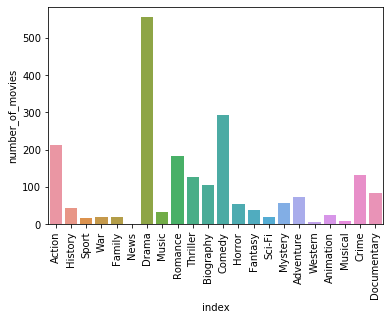

In [195]:
#plot number of movies in each genre in bottom half of movies
plt.xticks(rotation=90)
sns.barplot(data = bottom_number.reset_index(), x = 'index', y = 'number_of_movies')

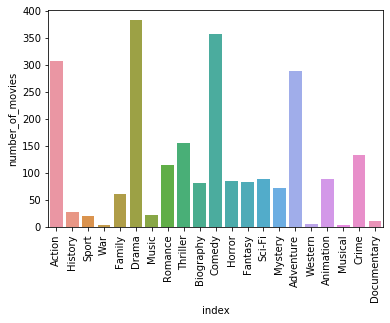

In [196]:
#plot num of movies in each genre in top half of movies
plt.xticks(rotation=90)
sns.barplot(data = top_number.reset_index(), x = 'index', y = 'number_of_movies')

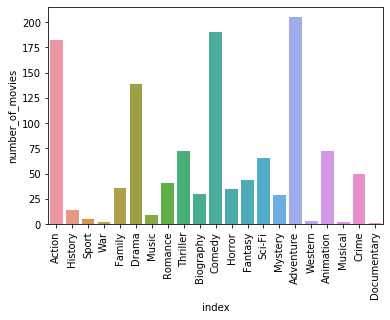

In [197]:
#plot number of movies in each genre in top 25% of movies
plt.xticks(rotation=90)
sns.barplot(data = top_quint_number.reset_index(), x = 'index', y = 'number_of_movies')

In [198]:
#combine data for number of movies from top and bottom half of movies
genres_df = bottom_number.reset_index().merge(top_number.reset_index(), on = 'index', suffixes = ('_bottom', '_top'))

In [199]:
#create column for total number of movies in new df
genres_df['total_movies'] = genres_df['number_of_movies_bottom'] + genres_df['number_of_movies_top']

In [200]:
genres_df.head()

,index,number_of_movies_bottom,number_of_movies_top,total_movies
0,Action,211,308,519
1,History,43,28,71
2,Sport,15,20,35
3,War,18,4,22
4,Family,20,61,81


In [201]:
#add top quintile number of movies
genres_df = genres_df.reset_index().merge(top_quint_number.reset_index(), on = 'index', suffixes =  ("", '_top_quint'))

In [202]:
genres_df.head()

,level_0,index,number_of_movies_bottom,number_of_movies_top,total_movies,number_of_movies
0,0,Action,211,308,519,182
1,1,History,43,28,71,14
2,2,Sport,15,20,35,5
3,3,War,18,4,22,2
4,4,Family,20,61,81,36


In [203]:
#create columns for the percent of top half and top quintile movies in each genre
genres_df['percent_top_half'] = genres_df['number_of_movies_top']/(genres_df['total_movies'])
genres_df['percent_top_quint'] = genres_df['number_of_movies']/genres_df['total_movies']

In [204]:
genres_df.head()

,level_0,index,number_of_movies_bottom,number_of_movies_top,total_movies,number_of_movies,percent_top_half,percent_top_quint
0,0,Action,211,308,519,182,0.593449,0.350674
1,1,History,43,28,71,14,0.394366,0.197183
2,2,Sport,15,20,35,5,0.571429,0.142857
3,3,War,18,4,22,2,0.181818,0.090909
4,4,Family,20,61,81,36,0.753086,0.444444


In [205]:
#create column for percent of movies in top quintile of the top half of movies
genres_df['top_half_of_top_half'] = genres_df['number_of_movies']/genres_df['number_of_movies_top']

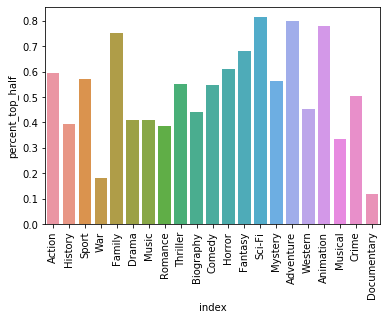

In [206]:
#plot percent of movies in top half for each genre
plt.xticks(rotation=90)
sns.barplot(data = genres_df, x = 'index', y = 'percent_top_half')

There are a lot of catagories over represented in the top half (ie. more than 50% of the movies in the genre are in the top half of earners)- Action, Adventure, Animation, Family, Fantasy, Horror,Mystery, SciFi, Sport & Thriller.  Adventure, Animation, Family Fantasy and SciFi are over 60% in the top half

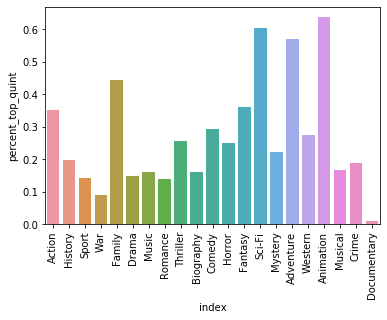

In [207]:
#same plot as above but top 25% of movies
plt.xticks(rotation=90)
sns.barplot(data = genres_df, x = 'index', y = 'percent_top_quint')

From this, I would recommend starting with a movie in the Adventure, Animation &/or SciFi genres, now I'd like to investigate which writers and directors do the best in these genres

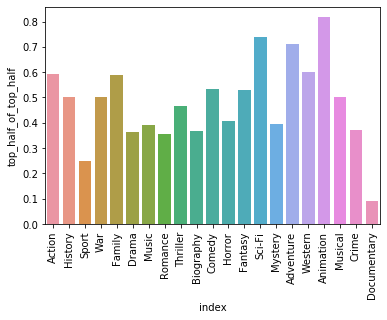

In [208]:
#same plot as above but top 25% of movies
plt.xticks(rotation=90)
sns.barplot(data = genres_df, x = 'index', y = 'top_half_of_top_half')

In [209]:
#narrow the datasets to those including Adventure, Animation or SciFi in their genre list

In [210]:
top_quintile.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,103.0,"[Adventure, Animation, Comedy]",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,93.0,"[Adventure, Animation, Comedy]",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,124.0,"[Adventure, Drama, Fantasy]",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,124.0,"[Action, Adventure, Sci-Fi]",7.0,657690


In [211]:
#top_quintile.iloc[top_quintile['genres'] == 'Adventure' | 'Animation' | 'Sci-Fi']

In [212]:
# genre_list = ['Adventure', 'Animation', 'Sci-Fi']
# for row in top_quintile.index:
#     if [lambda x: x in genre_list] in top_quintile['genres'][row]:
#         print('yes')

In [213]:
# adventure = ('Adventure' in top_quintile['genres'])
# animation = ('Animation' in top_quintile['genres'])
# criteria = adventure | animation
# top_quintile[criteria]

In [214]:
title_crew_df = pd.read_csv('../data/zippedData/imdb.title.crew.csv.gz', compression = 'gzip')
title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [215]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]"


In [216]:
name_basics_df = pd.read_csv('../data/zippedData/imdb.name.basics.csv.gz', compression = 'gzip')
name_basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [217]:
name_basics_df.describe()

,birth_year,death_year
count,82736.000000,6783.000000
mean,1967.043826,2000.523367
std,22.122190,43.951530
min,1.000000,17.000000
25%,1957.000000,2001.000000
50%,1971.000000,2013.000000
75%,1981.000000,2016.000000
max,2014.000000,2019.000000


In [218]:
print(len(title_crew_df))
print(len(title_basics_df))

146144
146144


In [219]:
imdb_crew_basics_df = title_basics_df.merge(title_crew_df, on = 'tconst')
imdb_crew_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",nm0002411,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],nm0000080,"nm0000080,nm0462648"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",nm0611531,nm0347899
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]","nm0765384,nm0749914","nm1360635,nm0749914"


In [220]:
imdb_crew_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",nm0002411,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],nm0000080,"nm0000080,nm0462648"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",nm0611531,nm0347899
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]","nm0765384,nm0749914","nm1360635,nm0749914"
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,[Drama],nm8185151,"nm4843252,nm4900525,nm2679404"
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,[Documentary],"nm9272490,nm9272491","nm9272490,nm9272491"
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,[Comedy],nm7764440,nm7933903
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,[unknown],nm10538612,nm10538612


In [221]:
imdb_crew_basics_df.shape

(146144, 8)

In [222]:
imdb_crew_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             146144 non-null object
directors          140417 non-null object
writers            110261 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 10.0+ MB


In [223]:
#filling NaN values for directors and writers with 'unknown'
imdb_crew_basics_df['directors'] = imdb_crew_basics_df['directors'].fillna('unknown')
imdb_crew_basics_df['writers'] = imdb_crew_basics_df['writers'].fillna('unknown')

In [224]:
imdb_crew_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             146144 non-null object
directors          146144 non-null object
writers            146144 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 10.0+ MB


In [225]:
#join writer/director names with imdb_crew_basics
#first separate writer & director columns into lists
imdb_crew_basics_df['directors'] = [x.split(',') for x in imdb_crew_basics_df['directors']]
imdb_crew_basics_df['writers'] = [x.split(',') for x in imdb_crew_basics_df['writers']]

In [226]:
#checking length of lists of directors
[len(x) for x in imdb_crew_basics_df['directors']]

[1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,


In [227]:
#this code works, but only for a small number of rows- it takes too long to iterate over all the rows for all the rows

# imdb_crew_basics_df['dir_names'] = 'unknown'
# for row in imdb_crew_basics_df[:5].index:
#     dir_name_list = []
#     for name in imdb_crew_basics_df['directors'][row]:
#         if name != 'unknown':
#             director = name_basics_df[name_basics_df['nconst'].str.match(name)].reset_index()
#             dir_name_list.append(director['primary_name'][0])
#         else: dir_name_list.append('unknown')
#     imdb_crew_basics_df.reset_index
#     imdb_crew_basics_df['dir_names'][row] = dir_name_list
            

In [228]:
#instead first create dictionary with nconst and names
director_dict = dict(zip(list(name_basics_df['nconst']), list(name_basics_df['primary_name'])))
# then create the column and add the names using list comprehension
imdb_crew_basics_df = imdb_crew_basics_df.assign(dir_names=[[director_dict[k] for k in row if director_dict.get(k)] for row in imdb_crew_basics_df['directors']])

In [229]:
#repeat for writers
imdb_crew_basics_df = imdb_crew_basics_df.assign(writer_names=[[director_dict[key] for key in row if director_dict.get(key)] for row in imdb_crew_basics_df['writers']])

In [230]:
imdb_crew_basics_df.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,dir_names,writer_names
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",[nm0712540],"[nm0023551, nm1194313, nm0347899, nm1391276]",[Harnam Singh Rawail],"[Abrar Alvi, Mahasweta Devi, Gulzar, Anjana Ra..."
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",[nm0002411],[unknown],[Mani Kaul],[]
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],[nm0000080],"[nm0000080, nm0462648]",[Orson Welles],"[Orson Welles, Oja Kodar]"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",[nm0611531],[nm0347899],[Hrishikesh Mukherjee],[Gulzar]
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]","[nm0765384, nm0749914]","[nm1360635, nm0749914]","[Valeria Sarmiento, Raoul Ruiz]","[Pía Rey, Raoul Ruiz]"


In [231]:
#check dir_names are correct
name_basics_df[name_basics_df['nconst']==('nm0000080')]

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
106605,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer","tt0048393,tt0052311,tt0057427,tt0033467"


In [232]:
name_basics_df.loc[name_basics_df['nconst']==('nm0000080')]

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
106605,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer","tt0048393,tt0052311,tt0057427,tt0033467"


In [233]:
imdb_crew_basics_df[imdb_crew_basics_df['primary_title'].str.contains('Star Wars')]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,dir_names,writer_names
2370,tt10239898,Star Wars: Battle for the Holocrons,Star Wars: Battle for the Holocrons,2020,NaN,"[Action, Adventure, Fantasy]",[nm2737823],[nm10646217],[Carlos Michael Hagene],[Richard Lemaire Gamboa]
2947,tt10300394,Untitled Star Wars Film,Untitled Star Wars Film,2022,NaN,[unknown],[unknown],[unknown],[],[]
2948,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,[unknown],[unknown],[unknown],[],[]
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,[Fantasy],[unknown],[unknown],[],[]
3219,tt10321138,RiffTrax: Star Wars: The Force Awakens,RiffTrax: Star Wars: The Force Awakens,2016,NaN,[Comedy],[unknown],"[nm4571467, nm0625621, nm4571481]",[],"[Conor Lastowka, Michael J. Nelson, Sean Thoma..."
34425,tt2275656,Star Wars: Threads of Destiny,Star Wars: Threads of Destiny,2014,110.0,"[Action, Adventure, Sci-Fi]",[nm2339469],"[nm5166168, nm5165119, nm5165990, nm5166844, n...",[Rasmus Tirzitis],"[Michael Banno, Jeffrey Long, Matthew Davis, S..."
41443,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,"[Action, Adventure, Fantasy]",[nm0009190],"[nm0001410, nm0009190, nm1578335, nm0000184]",[J.J. Abrams],"[Lawrence Kasdan, J.J. Abrams, Michael Arndt, ..."
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"[Action, Adventure, Fantasy]",[nm0426059],"[nm0426059, nm0000184]",[Rian Johnson],"[Rian Johnson, George Lucas]"
42224,tt2527338,Star Wars: The Rise of Skywalker,Star Wars: The Rise of Skywalker,2019,NaN,"[Action, Adventure, Fantasy]",[nm0009190],"[nm0009190, nm0006516, nm0000184, nm1119880, n...",[J.J. Abrams],"[J.J. Abrams, Chris Terrio, George Lucas, Coli..."
63494,tt3648510,Plastic Galaxy: The Story of Star Wars Toys,Plastic Galaxy: The Story of Star Wars Toys,2014,70.0,"[Documentary, History, Sci-Fi]",[nm2520673],[nm2520673],[Brian Stillman],[Brian Stillman]


In [234]:
names_ratings = imdb_crew_basics_df.merge(title_rating_df, on = 'tconst')

In [235]:
names_ratings.drop(columns=['original_title', 'runtime_minutes'], inplace = True)

In [236]:
doc_directors = names_ratings[names_ratings['genres'].apply(lambda x: 'Documentary' in x)]


In [237]:
doc_directors.describe()

,start_year,averagerating,numvotes
count,17753.000000,17753.000000,17753.000000
mean,2014.132654,7.332090,266.960232
std,2.548898,1.086263,1871.784743
min,2010.000000,1.000000,5.000000
25%,2012.000000,6.700000,9.000000
50%,2014.000000,7.400000,19.000000
75%,2016.000000,8.000000,67.000000
max,2019.000000,10.000000,74978.000000


In [238]:
# I want the popular directors, so will look for directors of movies with at least 67 votes
pop_doc_directors = doc_directors[(doc_directors['numvotes']>=67)&(doc_directors['averagerating']>=7.2)]
unpop_doc_directors = doc_directors[(doc_directors['numvotes']<67)|(doc_directors['averagerating']<7.2)]

In [239]:
pop_doc_directors[pop_doc_directors['directors'].apply(lambda x: 'unknown' in x)]

,tconst,primary_title,start_year,genres,directors,writers,dir_names,writer_names,averagerating,numvotes
578,tt10050766,Brené Brown: The Call to Courage,2019,"[Documentary, Drama]",[unknown],[unknown],[],[],7.6,445
12616,tt1872204,The Raid,2012,"[Adventure, Biography, Documentary]",[unknown],[unknown],[],[],7.4,135
12905,tt1887710,The Curious Case of Curt Flood,2011,[Documentary],[unknown],[nm1948790],[],[Aaron Cohen],7.3,108
13554,tt1928296,The Reality of Me (TROM),2011,[Documentary],[unknown],[unknown],[],[],8.3,301
16983,tt2090446,A Fall from Freedom,2011,"[Documentary, History]",[unknown],[nm3134197],[],[Stanley Minasian],8.2,69
17654,tt2114458,A Tribute to Ryan Dunn,2011,[Documentary],[unknown],[unknown],[],[],8.4,341
21613,tt2296338,Brian Eno: 1971-1977 - The Man Who Fell to Earth,2012,"[Biography, Documentary, Music]",[unknown],[unknown],[],[],7.6,131
33272,tt3203290,Free to Play,2014,"[Action, Documentary]",[unknown],[unknown],[],[],8.0,12704
36453,tt3478444,I AM Hardwell Documentary,2013,"[Documentary, Music]",[unknown],[nm6230907],[],[Robin Piree],8.1,410
45010,tt4330758,Black Hawk Down,2014,[Documentary],[unknown],[unknown],[],[],7.8,167


In [240]:
pop_doc_genres = creategenreinfoDF(pop_doc_directors, 'genres')
unpop_doc_genres = creategenreinfoDF(unpop_doc_directors, 'genres')

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [241]:
pop_doc_genres = pd.DataFrame(pop_doc_genres, columns = ['num_movies'])
unpop_doc_genres = pd.DataFrame(unpop_doc_genres, columns = ['num_movies'])

In [242]:
doc_genres = pop_doc_genres.reset_index().merge(unpop_doc_genres.reset_index(), on='index', suffixes= ['_pop', '_unpop'])

In [243]:
doc_genres['percent_pop']= doc_genres['num_movies_pop']/(doc_genres['num_movies_pop']+doc_genres['num_movies_unpop'])

In [244]:
doc_genres.head()

,index,num_movies_pop,num_movies_unpop,percent_pop
0,Action,20,169,0.105820
1,History,271,1420,0.160260
2,Sport,144,438,0.247423
3,War,45,191,0.190678
4,Family,71,531,0.117940


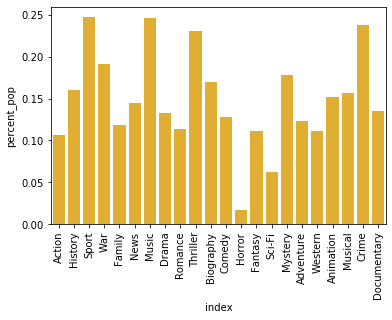

In [245]:
plt.xticks(rotation=90)
sns.barplot(data = doc_genres.reset_index(), x = 'index', y = 'percent_pop', color = '#FDBA15')

In [252]:
topdirectors = pop_doc_directors.sort_values(['numvotes', 'averagerating'], ascending=False)[:100]

In [ ]:
topdirectors['genres']=topdirectors[]